In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
import scipy.stats.mstats as mstats

In [2]:
spend = pd.read_csv('C:\Inna\'s files\data\WELLCOME_APCspend2013_forThinkful.csv', encoding='ISO-8859-1')
spend.head()

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [3]:
#creating a shorter column name
spend.rename(columns={'COST (£) charged to Wellcome (inc VAT when charged)':'Cost'}, inplace = True)

In [4]:
spend['Journal title'] = spend['Journal title'].astype('str')

In [5]:
#removed the pound sign 
spend['Cost'] = spend['Cost'].str.replace('£', '')

In [6]:
#made the cost numeric
spend['Cost'] = pd.to_numeric(spend['Cost'], errors='coerce')
spend = spend.dropna(subset=['Cost'])    

In [7]:
spend.dtypes

PMID/PMCID        object
Publisher         object
Journal title     object
Article title     object
Cost             float64
dtype: object

In [8]:
spend['Journal title'] = spend['Journal title'].apply(lambda x: str(x).upper())

In [9]:
#five most common journals and the number of articles
spend['Journal title'].value_counts().head(5)

PLOS ONE                           190
JOURNAL OF BIOLOGICAL CHEMISTRY     53
NEUROIMAGE                          29
PLOS GENETICS                       24
NUCLEIC ACIDS RESEARCH              23
Name: Journal title, dtype: int64

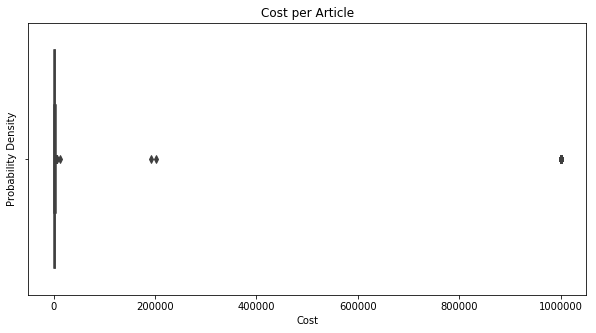

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(spend['Cost'])
plt.title('Cost per Article')
plt.ylabel('Probability Density')
plt.show()

In [11]:
#cost for the top 1 Journal
top_one=spend.loc[lambda df: spend['Journal title'] =='PLOS ONE', 'Cost']

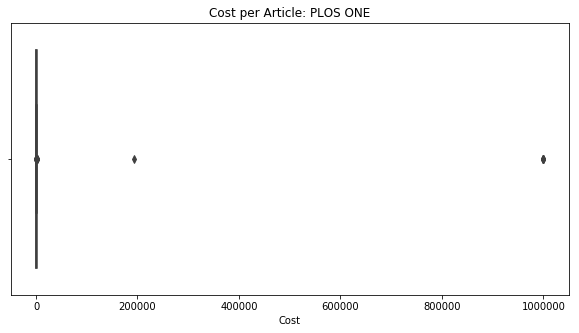

In [29]:
plt.figure(figsize=(10,5))
sns.boxplot(top_one)
plt.title('Cost per Article: PLOS ONE')
plt.show()

In [13]:
#windosorizing the cost since the data set has questionable entries
no_outliers = mstats.winsorize(top_one, limits=[0.05, 0.05])

c:\users\owner\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


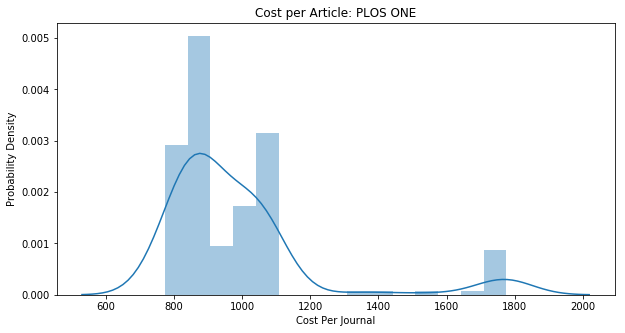

Mean cost: 985.8683684210525
Median cost: 898.475
Standard deviation: 232.01898518372082


c:\users\owner\appdata\local\programs\python\python36\lib\site-packages\numpy\core\fromnumeric.py:664: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [14]:
plt.figure(figsize=(10,5))
sns.distplot(no_outliers)
plt.title('Cost per Article: PLOS ONE')
plt.ylabel('Probability Density')
plt.xlabel('Cost Per Journal')
plt.show()

print('Mean cost:', np.mean(no_outliers))
print('Median cost:', np.median(no_outliers))
print('Standard deviation:', np.std(no_outliers, ddof=1))

In [15]:
top_two=spend.loc[lambda df: spend['Journal title'] =='JOURNAL OF BIOLOGICAL CHEMISTRY', 'Cost']

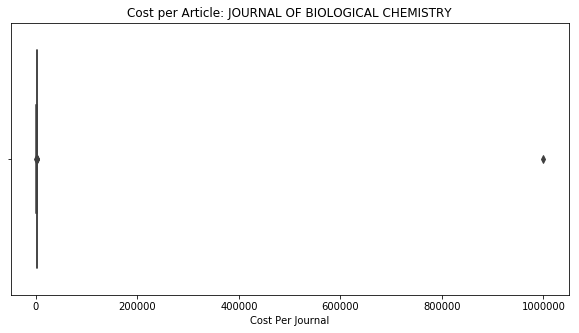

In [16]:
plt.figure(figsize=(10,5))
sns.boxplot(top_two)
plt.title('Cost per Article: JOURNAL OF BIOLOGICAL CHEMISTRY')
plt.xlabel('Cost Per Journal')
plt.show()

c:\users\owner\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


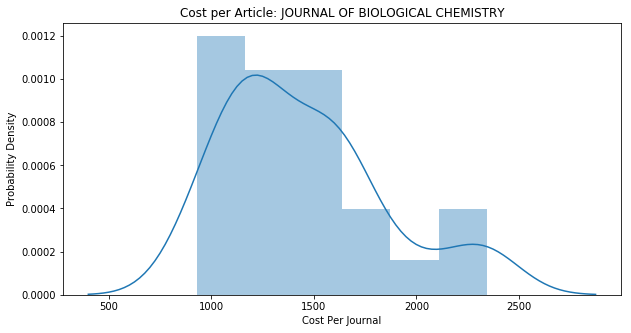

Mean cost: 1450.7652830188679
Median cost: 1314.53
Standard deviation: 393.3060364476604


c:\users\owner\appdata\local\programs\python\python36\lib\site-packages\numpy\core\fromnumeric.py:664: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [17]:
#windosorizing the cost since the data set has questionable entries
no_outliers_two = mstats.winsorize(top_two, limits=[0.05, 0.05])

plt.figure(figsize=(10,5))
sns.distplot(no_outliers_two)
plt.title('Cost per Article: JOURNAL OF BIOLOGICAL CHEMISTRY')
plt.ylabel('Probability Density')
plt.xlabel('Cost Per Journal')
plt.show()

print('Mean cost:', np.mean(no_outliers_two))
print('Median cost:', np.median(no_outliers_two))
print('Standard deviation:', np.std(no_outliers_two, ddof=1))

c:\users\owner\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


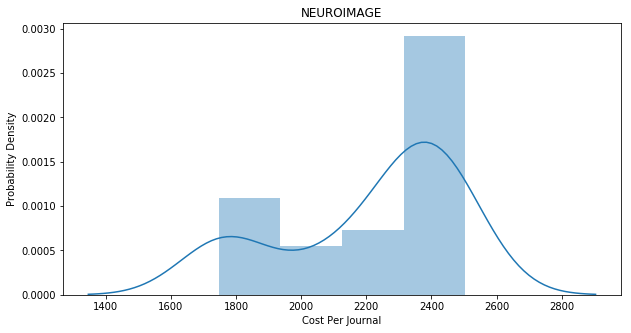

Mean cost: 2215.168275862069
Median cost: 2326.43
Standard deviation: 266.65394691928987


In [18]:
#Cost entries for this journal were 'clean', no dirty data 
top_three=spend.loc[lambda df: spend['Journal title'] =='NEUROIMAGE', 'Cost']

plt.figure(figsize=(10,5))
sns.distplot(top_three)
plt.title('NEUROIMAGE')
plt.xlabel('Cost Per Journal')
plt.ylabel('Probability Density')
plt.show()

print('Mean cost:', np.mean(top_three))
print('Median cost:', np.median(top_three))
print('Standard deviation:', np.std(top_three, ddof=1))

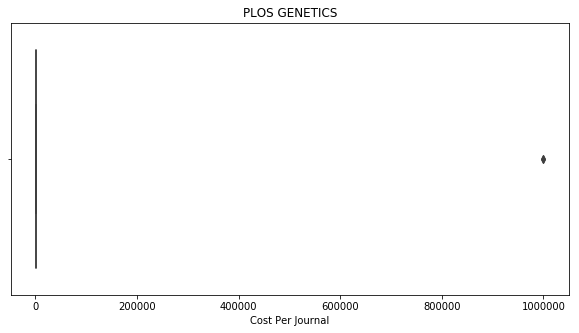

In [30]:
top_four=spend.loc[lambda df: spend['Journal title'] =='PLOS GENETICS', 'Cost']

plt.figure(figsize=(10,5))
sns.boxplot(top_four)
plt.title('PLOS GENETICS')
plt.xlabel('Cost Per Journal')
plt.show()

In [26]:
#windosorizing the cost since the data set has questionable entries
no_outliers_three = mstats.winsorize(top_four, limits=[0.05, 0.05])

c:\users\owner\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


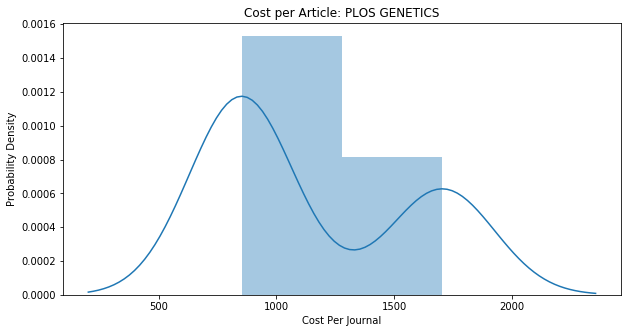

Mean cost: 1148.3478260869565
Median cost: 852.0
Standard deviation: 414.9110100311382


c:\users\owner\appdata\local\programs\python\python36\lib\site-packages\numpy\core\fromnumeric.py:664: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [27]:
plt.figure(figsize=(10,5))
sns.distplot(no_outliers_three)
plt.title('Cost per Article: PLOS GENETICS')
plt.ylabel('Probability Density')
plt.xlabel('Cost Per Journal')
plt.show()

print('Mean cost:', np.mean(no_outliers_three))
print('Median cost:', np.median(no_outliers_three))
print('Standard deviation:', np.std(no_outliers_three, ddof=1))

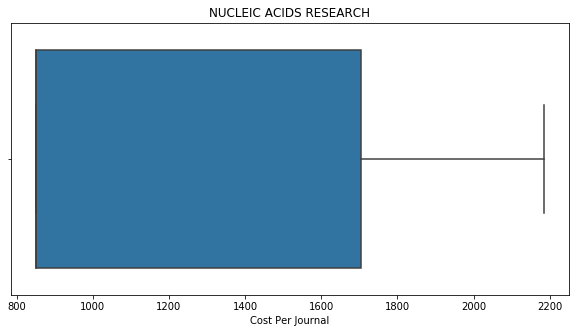

In [31]:
#reasonably clean data, no outliers
top_five=spend.loc[lambda df: spend['Journal title'] =='NUCLEIC ACIDS RESEARCH', 'Cost']

plt.figure(figsize=(10,5))
sns.boxplot(top_five)
plt.title('NUCLEIC ACIDS RESEARCH')
plt.xlabel('Cost Per Journal')
plt.show()

c:\users\owner\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


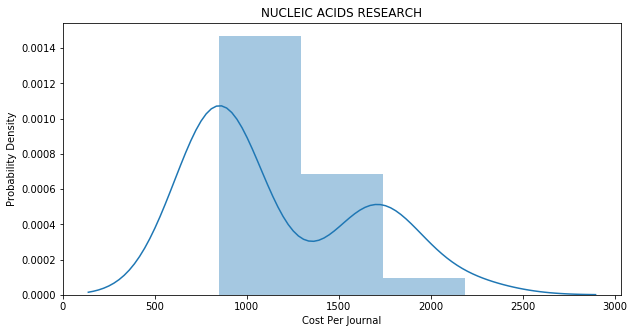

Mean cost: 1169.2173913043478
Median cost: 852.0
Standard deviation: 454.3293715638608


In [25]:
plt.figure(figsize=(10,5))

sns.distplot(top_five)
plt.title('NUCLEIC ACIDS RESEARCH')
plt.xlabel('Cost Per Journal')
plt.ylabel('Probability Density')
plt.show()

print('Mean cost:', np.mean(top_five))
print('Median cost:', np.median(top_five))
print('Standard deviation:', np.std(top_five, ddof=1))